In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['NFLX', 'TSLA', 'FB', 'AMZN', 'MSFT', 'AAPL', 'GOOG', 'GOLD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2013-01-03')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768 entries, 2013-01-03 to 2020-01-10
Data columns (total 8 columns):
NFLX    1768 non-null float64
TSLA    1768 non-null float64
FB      1768 non-null float64
AMZN    1768 non-null float64
MSFT    1768 non-null float64
AAPL    1768 non-null float64
GOOG    1768 non-null float64
GOLD    1768 non-null float64
dtypes: float64(8)
memory usage: 124.3 KB


In [4]:
mydata.head()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2013-01-03,13.798572,34.770000,27.770000,258.480011,23.112528,67.981491,360.483826,17.027550
2013-01-04,13.711429,34.400002,28.760000,259.149994,22.679964,66.087891,367.607117,17.101698
2013-01-07,14.171429,34.340000,29.420000,268.459991,22.637556,65.699158,366.003143,16.849619
2013-01-08,13.880000,33.680000,29.059999,266.380005,22.518806,65.875954,365.280823,16.562946
2013-01-09,13.701428,33.639999,30.590000,266.350006,22.646034,64.846390,367.681824,16.612371


In [5]:
mydata.tail()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2020-01-06,335.829987,451.540009,212.600006,1902.880005,159.029999,299.799988,1394.209961,18.389999
2020-01-07,330.750000,469.059998,213.059998,1906.859985,157.580002,298.390015,1393.339966,18.469999
2020-01-08,339.260010,492.140015,215.220001,1891.969971,160.089996,303.190002,1404.319946,17.820000
2020-01-09,335.660004,481.339996,218.300003,1901.050049,162.089996,309.630005,1419.829956,17.600000
2020-01-10,329.049988,478.149994,218.059998,1883.160034,161.339996,310.329987,1429.729980,17.850000


In [6]:
mydata.iloc[0]

NFLX     13.798572
TSLA     34.770000
FB       27.770000
AMZN    258.480011
MSFT     23.112528
AAPL     67.981491
GOOG    360.483826
GOLD     17.027550
Name: 2013-01-03 00:00:00, dtype: float64

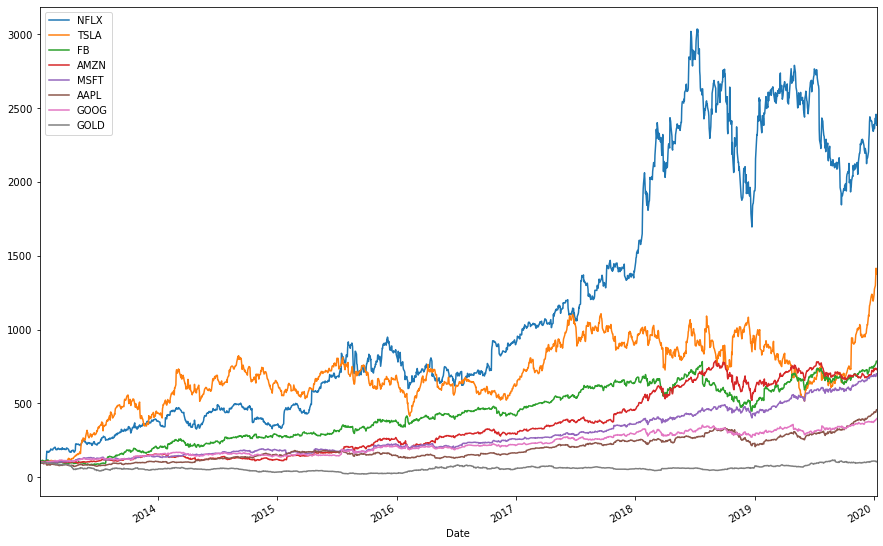

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,10));
plt.legend()
plt.show()

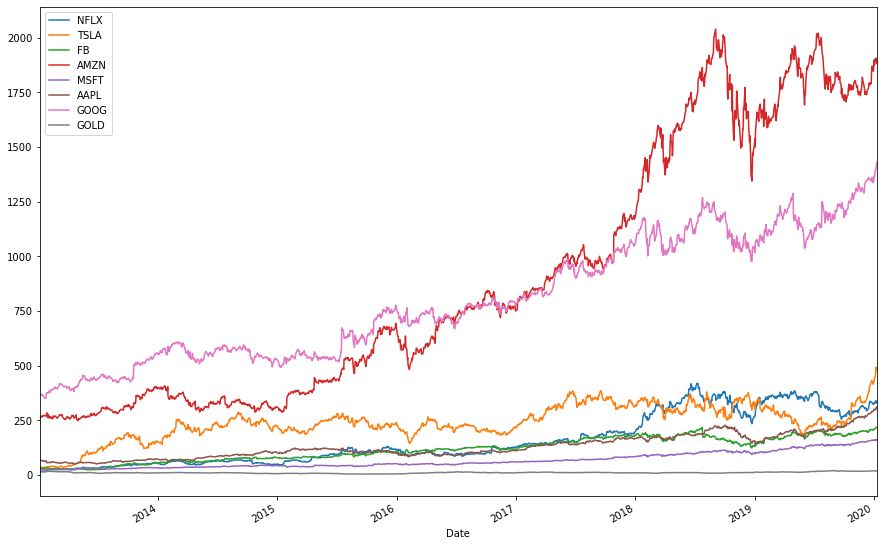

In [9]:
mydata.plot(figsize=(15,10))
plt.show()

In [10]:
mydata.loc['2013-01-03']

NFLX     13.798572
TSLA     34.770000
FB       27.770000
AMZN    258.480011
MSFT     23.112528
AAPL     67.981491
GOOG    360.483826
GOLD     17.027550
Name: 2013-01-03 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

NFLX     13.798572
TSLA     34.770000
FB       27.770000
AMZN    258.480011
MSFT     23.112528
AAPL     67.981491
GOOG    360.483826
GOLD     17.027550
Name: 2013-01-03 00:00:00, dtype: float64

In [12]:
returns = (mydata / mydata.shift(1)) - 1

In [13]:
returns.head()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,-0.006315,-0.010641,0.035650,0.002592,-0.018716,-0.027855,0.019760,0.004355
2013-01-07,0.033549,-0.001744,0.022949,0.035925,-0.001870,-0.005882,-0.004363,-0.014740
2013-01-08,-0.020565,-0.019220,-0.012237,-0.007748,-0.005246,0.002691,-0.001974,-0.017014
2013-01-09,-0.012865,-0.001188,0.052650,-0.000113,0.005650,-0.015629,0.006573,0.002984


In [14]:
weights = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])

In [15]:
np.dot(returns, weights)

array([        nan, -0.00014624,  0.00797786, ...,  0.0102458 ,
        0.00237331, -0.00225239])

In [16]:
annual_returns = returns.mean() * 250
annual_returns

NFLX    0.549146
TSLA    0.490600
FB      0.343102
AMZN    0.323682
MSFT    0.301135
AAPL    0.245897
GOOG    0.221669
GOLD    0.102113
dtype: float64

In [17]:
np.dot(annual_returns, weights)

0.3221679365474552

In [18]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 5) *100) + '%'
print(pfolio_1)

32.217%


In [19]:
weights_2 = np.array([0.208,0.145,0.124,0.114,0.108,0.103,0.100,0.098])

In [21]:
pfolio_2 =str(round(np.dot(annual_returns, weights_2), 5) *100) + '%'
print('Portifolio 1: ',pfolio_1)
print('Portifolio 2: ',pfolio_2)

Portifolio 1:  32.217%
Portifolio 2:  35.483%
